In [ ]:
# Exploring the book ratings dataset

In [1]:
%matplotlib inline
import pandas as pd
import re
import seaborn as sns
path='/home/kliton/Documents/Springboard/Capstone/BookRatings/BX-CSV-Dump/'


Loading the dataset:

In [2]:
import csv
bx_users = pd.read_csv(path+'BX-Users.csv', quotechar='"', 
                       na_values='NULL', quoting=csv.QUOTE_ALL,  
                       sep=";", encoding='iso-8859-1' )
bx_books = pd.read_csv(path+'BX-Books.csv', quotechar='"', na_values='NULL', 
                       quoting=csv.QUOTE_ALL,  sep=";", encoding='iso-8859-1', escapechar='\\')
bx_ratings = pd.read_csv(path+'BX-Book-Ratings.csv', quotechar='"', na_values='NULL', quoting=csv.QUOTE_ALL,  sep=";", encoding='iso-8859-1' )

In [112]:
path2 = '/home/kliton/Documents/Springboard/Capstone/BookRatings/' 
#BookInfo = pd.read_csv(path2+'BookInfoClean.csv')
BookInfo = pd.read_csv(path2 + 'BkProcessed.csv')
AuthorInfo = pd.read_csv(path2 + 'AuthorsProcessed.csv')

/home/kliton/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6,46,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Exploring the data

In [4]:
BookInfo.head()


,Unnamed: 0,Unnamed: 0.1,authors,by_statement,contributions,contributors,coverimage,covers,created.type,created.value,...,uris,url,weight,work_title,work_titles,works,isbn10,average_rating,average_rating_sd,dewey_parsed
0,0,0,NaN,edited by Stephanie Newell.,"['Newell, Stephanie, 1968-']",NaN,NaN,"[4872475, 4872461, 3858348, 3858328]",/type/datetime,2008-04-01T03:28:50.625462,...,['http://www.loc.gov/catdir/description/hol055...,['http://www.loc.gov/catdir/description/hol055...,NaN,NaN,NaN,NaN,"['1856494497', '1856494500']",3.00,0.0,820
1,1,0,[{'key': '/authors/OL230045A'}],Mario Bencastro.,NaN,NaN,NaN,[1882676],/type/datetime,2008-04-01T03:28:50.625462,...,NaN,NaN,NaN,NaN,NaN,[{'key': '/works/OL1919075W'}],['1558851941'],3.80,NaN,863
2,3,0,[{'key': '/authors/OL244070A'}],by Robb Armstrong.,NaN,NaN,NaN,"[3857941, 3857863]",/type/datetime,2008-04-01T03:28:50.625462,...,NaN,NaN,NaN,NaN,NaN,[{'key': '/works/OL2021805W'}],"['0060275278', '0064420477']",4.00,0.0,Fictional
3,4,0,[{'key': '/authors/OL24054A'}],Sandra Belton.,NaN,NaN,NaN,[3857889],/type/datetime,2008-04-01T03:28:50.625462,...,NaN,NaN,NaN,NaN,NaN,[{'key': '/works/OL16070305W'}],['0689808461'],3.57,NaN,Fictional
4,5,0,[{'key': '/authors/OL18073A'}],by Robert Kraus ; pictures by Jose Aruego & Ar...,"['Aruego, Jose, ill.', 'Dewey, Ariane, ill.']",NaN,NaN,"[1065268, 24175]",/type/datetime,2008-04-01T03:28:50.625462,...,['http://www.loc.gov/catdir/description/hc041/...,['http://www.loc.gov/catdir/description/hc041/...,NaN,NaN,NaN,[{'key': '/works/OL407762W'}],"['0060262931', '006026294X']",3.47,NaN,Educational


In [5]:
BookInfo.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'authors', 'by_statement',
       'contributions', 'contributors', 'coverimage', 'covers', 'created.type',
       'created.value', 'description', 'description.type', 'description.value',
       'dewey_decimal_class', 'edition_name', 'first_sentence',
       'first_sentence.type', 'first_sentence.value', 'full_title', 'genres',
       'ia_loaded_id', 'isbn_10', 'isbn_13', 'languages', 'last_modified.type',
       'last_modified.value', 'latest_revision', 'lc_classifications', 'links',
       'location', 'notes', 'notes.type', 'notes.value', 'number_of_pages',
       'other_titles', 'pagination', 'physical_dimensions', 'physical_format',
       'publish_country', 'publish_date', 'publish_places', 'publishers',
       'revision', 'series', 'source_records', 'subject_place',
       'subject_places', 'subject_time', 'subject_times', 'subjects',
       'subtitle', 'table_of_contents', 'title', 'title_prefix',
       'translated_from', 'translation_of', 't

Let's visualize the structure of the data that we have:

In [6]:
BnotNull = BookInfo[BookInfo.columns[1:65]].notnull()
newDF = pd.DataFrame()
for i in BnotNull.columns:
    newDF = pd.DataFrame.append(newDF, BnotNull[i].value_counts().sort_index()) #.pivot_table(index=BnotNull.columns, aggfunc=pd.Series.value_counts)
newDF.fillna(0,  inplace=True)
newDF['Total'] = newDF[0]+newDF[1]
newDF['Category']=newDF.index
newDF['Empty'] = newDF[0]
newDF

,True,False,Total,Category,Empty
Unnamed: 0.1,12190.0,0.0,12190.0,Unnamed: 0.1,0.0
authors,11401.0,789.0,12190.0,authors,789.0
by_statement,11536.0,654.0,12190.0,by_statement,654.0
contributions,3598.0,8592.0,12190.0,contributions,8592.0
contributors,17.0,12173.0,12190.0,contributors,12173.0
coverimage,2.0,12188.0,12190.0,coverimage,12188.0
covers,6940.0,5250.0,12190.0,covers,5250.0
created.type,11633.0,557.0,12190.0,created.type,557.0
created.value,11633.0,557.0,12190.0,created.value,557.0
description,45.0,12145.0,12190.0,description,12145.0


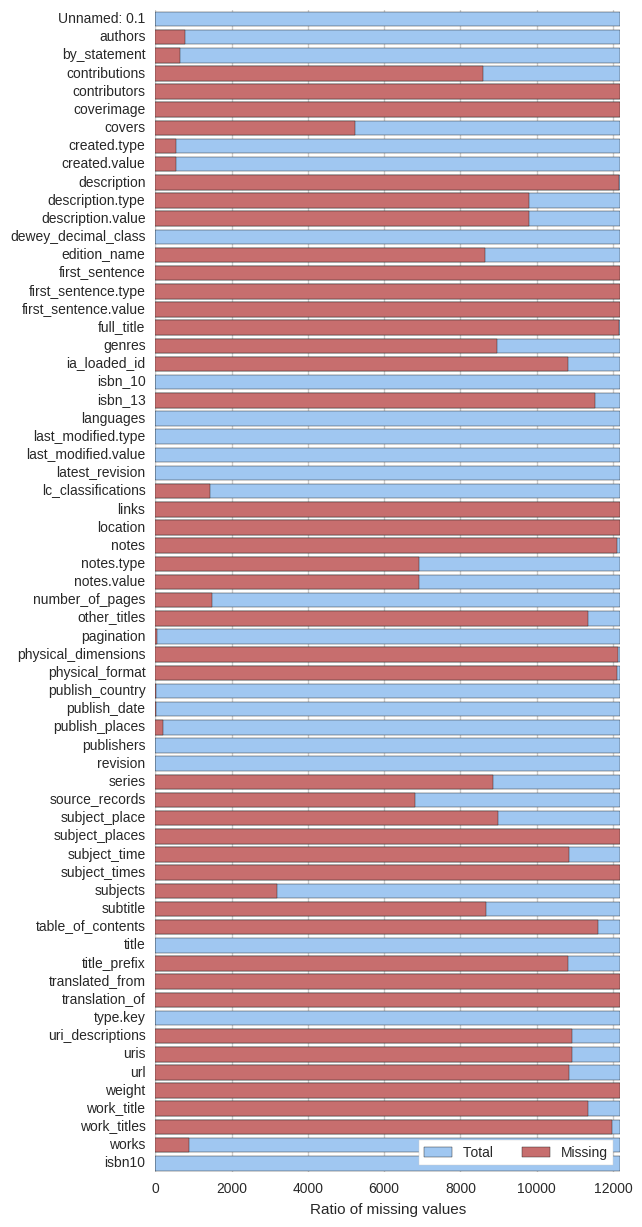

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Total", y="Category", data=newDF,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Empty", y="Category", data=newDF,
            label="Missing", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 12190), ylabel="",
       xlabel="Ratio of missing values")
sns.despine(left=True, bottom=True)

### The histogram of overall ratings

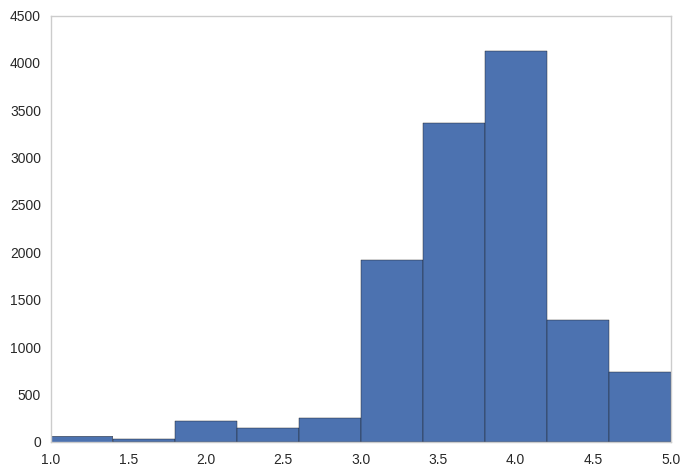

In [8]:
BookInfo.average_rating.hist(grid=False);

### The distribution of ratings over the books published in years

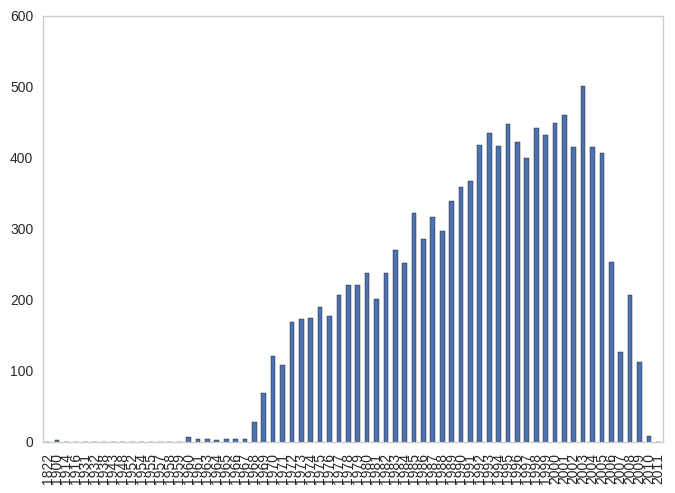

In [9]:
Dates = BookInfo.publish_date.str.findall('\d{4}') # need only the year, some records have the date
gr=pd.Series(data = [term for i in Dates for term in (i if type(i) == list else '' )]).value_counts().sort_index().plot(kind='bar', grid=False)
#sns.barplot(x=gr.index, y=gr.values, label='Number of books each year');

There seems to be a trend of rated books starting from year 1968. That trend has been increasing until 2007. And then dropped down. 

### The average book rating by language

We would like to capture not only the average but also the quantity of books for each category

In [10]:
tl1 = BookInfo.languages.apply(lambda x: eval(x) if type(x)==str else x)
tl1 = tl1.apply(lambda x: x[0]['key'])
BookInfo['languagest'] = tl1.apply(lambda x: x.split(sep='/')[2])

In [11]:
counttable=BookInfo[['languagest', 'average_rating']].groupby('languagest').agg(['count', 'mean'])

In [12]:
CTSorted = counttable.sort_values(by=[('average_rating', 'mean')])
CTSorted

average_rating          
                    count      mean
languagest                         
por                    32  3.515000
fre                   182  3.671209
ger                    90  3.739444
eng                 11587  3.746493
spa                   231  3.764810
lat                     8  3.767500
ita                    47  3.857234
rus                     8  4.168750
dut                     5  4.620000

This is a simple line graphic

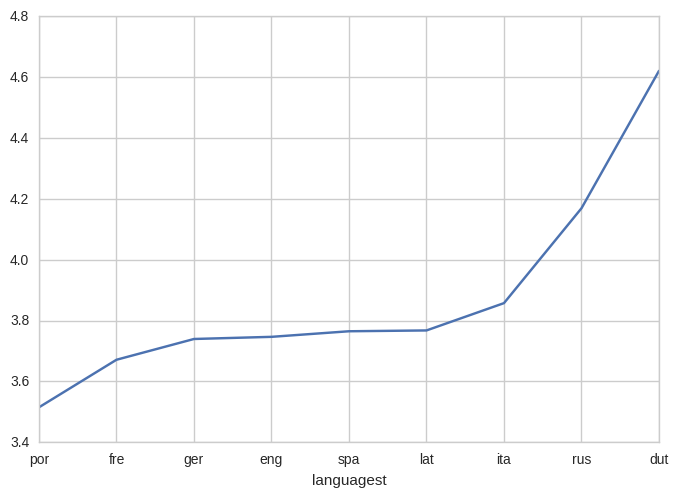

In [13]:
CTSorted[('average_rating', 'mean')].plot();

In [14]:
CTR = CTSorted.reset_index()
CTR.columns = pd.Index("_".join(i) for i in CTR.columns)

In [15]:
import math
CTR.columns =pd.Index(['language', 'average-rating-count', 'average-rating-mean'])
CTR['average-rating-count'].apply(lambda x: math.sqrt(x)) 

0      5.656854
1     13.490738
2      9.486833
3    107.642928
4     15.198684
5      2.828427
6      6.855655
7      2.828427
8      2.236068
Name: average-rating-count, dtype: float64

### This is a ratings score visualization by language, where the size of the points varies according to the number of records for each group

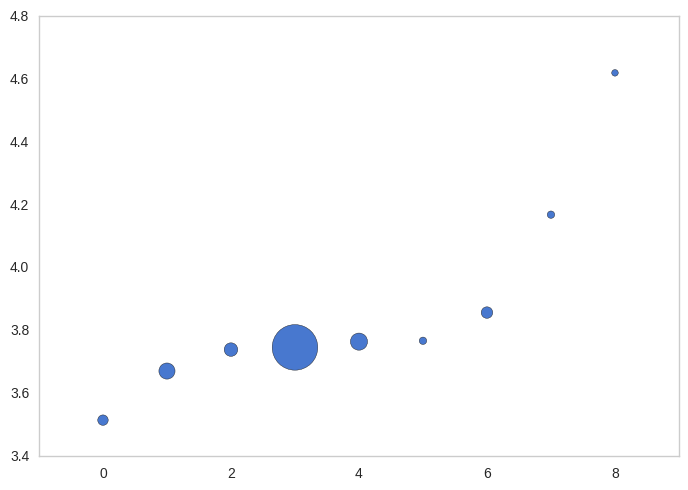

In [16]:
fig = plt.figure()

#ax.scatter(x='language', y='average-rating-mean', data=CTR, size=CTR['average-rating-count'].apply(lambda x: math.log(x)))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
ax.legend(CTR['language'])
ax.grid(b=False)
ax.scatter(x=range(0,len(list(CTR['language']))), y=list(CTR['average-rating-mean']), s=10*CTR['average-rating-count'].apply(lambda x: math.sqrt(x)));

### An initial boxplot comparison of ratings based on genre category

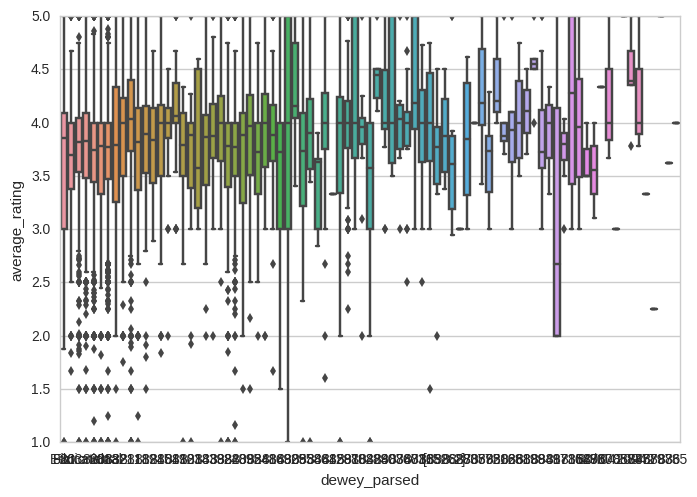

In [17]:
sns.boxplot(x='dewey_parsed', y = 'average_rating', data=BookInfo)

In [18]:
BookInfo.dewey_parsed.value_counts().tail()

897    1
887    1
877    1
845    1
836    1
Name: dewey_parsed, dtype: int64

There are many genres that have less than 10 records. Let's filter those out and build the boxplot diagram again.

In [19]:
GenresCount = BookInfo.dewey_parsed.value_counts()
GenreCountGT10 = GenresCount[GenresCount > 10]
GenreAverage = BookInfo[BookInfo.dewey_parsed.isin(GenreCountGT10.index)][['dewey_parsed', 'average_rating']]

In [20]:
genresDictionary = {800 : "Literature and rhetoric", 801 : "Philosophy & theory", 802 : "Miscellany", 803 : "Dictionaries & encyclopedias", 804 : "not used", 805 : "Serial publications", 806 : "Organizations", 807 : "Education, research, related topics", 808 : "Rhetoric & collections of literature", 809 : "Literary history & criticism", 810 : "American or Canadian literature in English", 811 : "Poetry", 812 : "Drama", 813 : "Fiction", 814 : "Essays", 815 : "Speeches", 816 : "Letters", 817 : "Satire & humor", 818 : "Miscellaneous writings", 819 : "Without local emphasis", 820 : "English literature in English", 821 : "Poetry", 822 : "Drama", 823 : "Fiction", 824 : "Essays", 825 : "Speeches", 826 : "Letters", 827 : "Satire & humor", 828 : "Miscellaneous writings", 829 : "Old English", 830 : "Literatures of Germanic languages", 831 : "German poetry", 832 : "German drama", 833 : "German fiction", 834 : "German essays", 835 : "German speeches", 836 : "German letters", 837 : "German satire & humor", 838 : "German miscellaneous writings", 839 : "Other Germanic literatures", 840 : "Literatures of Romance languages", 841 : "French poetry", 842 : "French drama", 843 : "French fiction", 844 : "French essays", 845 : "French speeches", 846 : "French letters", 847 : "French satire & humor", 848 : "French miscellaneous writings", 849 : "Provençal & Catalan", 850 : "Italian, Romanian, Rhæto-Romanic", 851 : "Italian poetry", 852 : "Italian drama", 853 : "Italian fiction", 854 : "Italian essays", 855 : "Italian speeches", 856 : "Italian letters", 857 : "Italian satire & humor", 858 : "Italian miscellaneous writings", 859 : "Romanian & Rhæto-Romanic", 860 : "Spanish & Portuguese literatuers", 861 : "Spanish poetry", 862 : "Spanish drama", 863 : "Spanish fiction", 864 : "Spanish essays", 865 : "Spanish speeches", 866 : "Spanish letters", 867 : "Spanish satire & humor", 868 : "Spanish miscellaneous writings", 869 : "Portuguese", 870 : "Latin & Old Latin literatuers", 871 : "Latin poetry", 872 : "Latin dramatic poetry and drama", 873 : "Latin epic poetry and fiction", 874 : "Latin lyric poetry", 875 : "Latin speeches", 876 : "Latin letters", 877 : "Latin satire & humor", 878 : "Latin miscellaneous writings", 879 : "Literatures of other Italic languages", 880 : "Hellenic literatures; Classical Greek", 881 : "Classical Greek poetry", 882 : "Classical Greek dramatic poetry and drama", 883 : "Classical Greek epic poetry and fiction", 884 : "Classical Greek lyric poetry", 885 : "Classical Greek speeches", 886 : "Classical Greek letters", 887 : "Classical Greek satire & humor", 888 : "Classical Greek miscellaneous writings", 889 : "Modern Greek", 890 : "Literatures of other languages", 891 : "East Indo-European & Celtic literatures", 892 : "Afro-Asiatic literatures; Semitic", 893 : "Non-Semitic Afro-Asiatic literatures", 894 : "Ural-Altaic, Paleosiberian, Dravidian", 895 : "Literatures of East & Southeast Asia", 896 : "African literatures", 897 : "North American native literatures", 898 : "South American native literatures", 899 : "Other literatures"}

In [21]:
GenreAverage['Genres'] = GenreAverage.dewey_parsed.apply(lambda x: genresDictionary[int(x)] if x.startswith('8') else x)

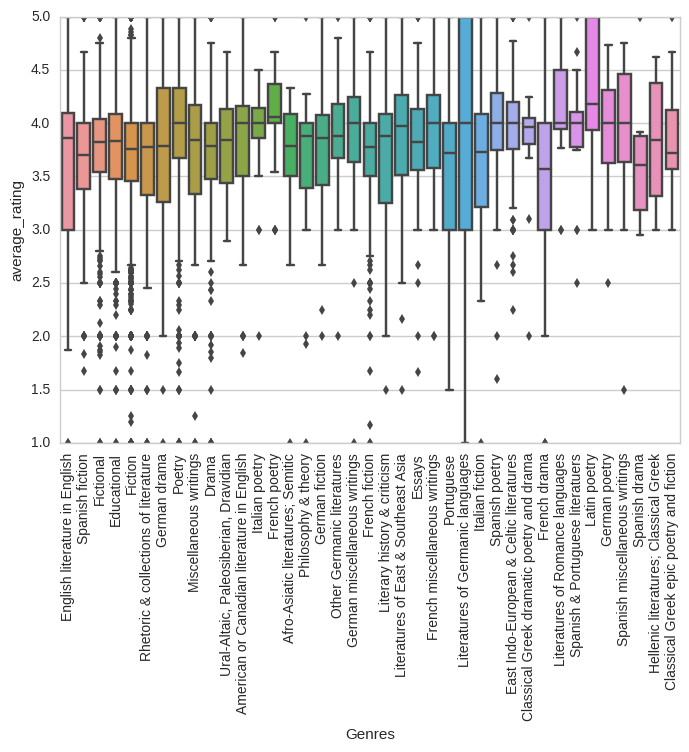

In [22]:
GenreRatingGR = sns.boxplot(x='Genres', y = 'average_rating', data=GenreAverage )
for item in GenreRatingGR.get_xticklabels():
    item.set_rotation(90)

From the above view, poetry works seem to have better ratings than the rest. A statistical test will help understand the difference.

In [129]:
GenreRatingDF = BookInfo[['dewey_parsed', 'average_rating']].groupby('dewey_parsed').mean()
GR = GenreRatingDF[GenreRatingDF.index.isin(GenreCountGT10.index)].sort_values(by='average_rating', ascending=False)
#GenreRatingDF.loc[:('Genre')] = GenreRatingDF
GR.reset_index(inplace=True)
GR.loc[:, ('Genre')] = GR.dewey_parsed.apply(lambda x: genresDictionary[int(x)] if x.startswith('8') else x)
GR.set_index('Genre')

,dewey_parsed,average_rating
Genre,,
Latin poetry,871,4.316000
Literatures of Romance languages,840,4.095833
French poetry,841,4.090000
Poetry,811,3.976528
East Indo-European & Celtic literatures,891,3.964320
Spanish poetry,861,3.960615
Classical Greek epic poetry and fiction,883,3.934706
Other Germanic literatures,839,3.924545
Italian poetry,851,3.909655


# Authors

In [189]:
AuthorInfo[AuthorInfo.key.str.contains('/authors/OL1122551A', na=False)][['key', 'name', 'personal_name']]

,key,name,personal_name


In [156]:
eval(BookInfo.authors.loc[1])[0]['key']

'/authors/OL230045A'

In [188]:
authAverageCount = BookInfo[['authors', 'average_rating']].groupby(['authors']).agg(['count', 'mean'])
authAverageCount.sort_values(by=[('average_rating', 'count')], ascending=False)
authNames = AuthorInfo[['key', 'personal_name']]
#authNames.set_index('key', inplace=True)
authAverageCount.reset_index(inplace=True)
authAverageCount['key'] = authAverageCount['authors'].apply(lambda x: eval(x)[0]['key'] if type(x) == str else x )
#authAverageCount.loc[:,('AuthorName')] = authAverageCount.authors.apply(lambda x: AuthorInfo.personal_name[AuthorI])
authAverageCount.set_index(('key', ''))
res = authAverageCount.join(authNames.set_index('key'), on='key')
res.drop([('authors', '')], axis=1, inplace=True)
#res.sort_values(by=[('average_rating', 'count')], ascending=False)
res.columns = pd.Index(['average_rating_count', 'average_rating_mean', 'key', 'author'])
res.set_index(['author'], inplace=True)
res.sort_values(by=['average_rating_count'], ascending=False)

/home/kliton/.local/lib/python3.5/site-packages/pandas/tools/merge.py:489: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,average_rating_count,average_rating_mean,key
author,,,
NaN,73,3.732055,/authors/OL1122551A
William Shakespeare,42,3.862381,/authors/OL9388A
Mark Twain,16,3.859375,/authors/OL18319A
Bernard Cornwell,14,4.098571,/authors/OL25793A
Frederick Schiller Faust,13,3.850769,/authors/OL2748402A
Enid Blyton,12,4.165833,/authors/OL233814A
Catherine Cookson,11,3.780909,/authors/OL21256A
Robert Louis Stevenson,11,3.928182,/authors/OL219525A
Agatha Christie,11,3.726364,/authors/OL27695A


In [191]:
BookInfo[BookInfo.authors.str.contains('/authors/OL1122551A', na=False)]

,Unnamed: 0,Unnamed: 0.1,authors,by_statement,contributions,contributors,coverimage,covers,created.type,created.value,...,uris,url,weight,work_title,work_titles,works,isbn10,average_rating,average_rating_sd,dewey_parsed
50,92,0,[{'key': '/authors/OL1122551A'}],by Beatrix Potter.,NaN,NaN,NaN,[407407],/type/datetime,2008-04-01T03:28:50.625462,...,NaN,NaN,NaN,NaN,NaN,[{'key': '/works/OL108774W'}],['0671692542'],4.27,NaN,Educational
549,948,0,[{'key': '/authors/OL1122551A'}],story by Margaret Wise Brown ; illustrations b...,"['Charlip, Remy, ill.']",NaN,NaN,NaN,/type/datetime,2008-04-01T03:28:50.625462,...,NaN,NaN,NaN,NaN,NaN,[{'key': '/works/OL151885W'}],['0201091674'],3.57,NaN,Educational
685,1147,0,[{'key': '/authors/OL1122551A'}],Jean and Claudio Marzollo ; pictures by Susan ...,"['Marzollo, Claudio.', 'Meddaugh, Susan, ill.']",NaN,NaN,NaN,/type/datetime,2008-04-01T03:28:50.625462,...,NaN,NaN,NaN,NaN,NaN,[{'key': '/works/OL14856035W'}],"['0803774931', '080377494X']",3.86,NaN,Educational
892,1456,0,[{'key': '/authors/OL1122551A'}],[by] Marian Babson.,NaN,NaN,NaN,NaN,/type/datetime,2008-04-01T03:28:50.625462,...,NaN,NaN,NaN,NaN,NaN,[{'key': '/works/OL18665W'}],['0002318377'],3.41,NaN,813
1083,1829,0,[{'key': '/authors/OL1122551A'}],by Mary Stolz.,NaN,NaN,NaN,[6763938],/type/datetime,2008-04-01T03:28:50.625462,...,NaN,NaN,NaN,NaN,NaN,[{'key': '/works/OL2040500W'}],['0060258306'],4.32,NaN,Fictional
1250,2105,0,[{'key': '/authors/OL1122551A'}],by Dick King-Smith ; illustrated by Richard Be...,"['Bernal, Richard, ill.']",NaN,NaN,"[424004, 423026]",/type/datetime,2008-04-01T03:28:50.625462,...,['http://www.loc.gov/catdir/bios/random051/960...,['http://www.loc.gov/catdir/bios/random051/960...,NaN,NaN,NaN,[{'key': '/works/OL14949W'}],"['0679983309', '0679883304']",3.62,0.0,Fictional
1525,2529,0,[{'key': '/authors/OL1122551A'}],written by Jack Gantos ; and illustrated by Ni...,"['Rubel, Nicole, ill.']",NaN,NaN,[1196350],/type/datetime,2008-04-01T03:28:50.625462,...,['http://www.loc.gov/catdir/description/hm021/...,['http://www.loc.gov/catdir/description/hm021/...,NaN,NaN,NaN,[{'key': '/works/OL82763W'}],['0395537665'],4.00,NaN,Educational
1554,2574,0,[{'key': '/authors/OL1122551A'}],by Jean Marzollo ; illustrations by Irene Trivas.,"['Trivas, Irene, ill.']",NaN,NaN,[7112418],/type/datetime,2008-04-01T03:28:50.625462,...,NaN,NaN,NaN,NaN,NaN,[{'key': '/works/OL14855886W'}],['0590427261'],2.50,NaN,Educational
1575,2619,0,[{'key': '/authors/OL1122551A'}],by Jean Marzollo ; illustrated by Blanche Sims.,"['Sims, Blanche, ill.']",NaN,NaN,"[6612662, 4065976, 4065891]",/type/datetime,2008-04-01T03:28:50.625462,...,['http://www.loc.gov/catdir/description/random...,['http://www.loc.gov/catdir/description/random...,NaN,NaN,NaN,[{'key': '/works/OL14856029W'}],"['039482881X', '0394928814']",3.50,NaN,Educational
1588,2639,0,[{'key': '/authors/OL1122551A'}],by Beatrix Potter.,NaN,NaN,NaN,[459302],/type/datetime,2008-04-01T03:28:50.625462,...,NaN,NaN,NaN,NaN,NaN,[{'key': '/works/OL108772W'}],['0723234671'],4.08,NaN,Educational


In [146]:
authAverageCount.authors

0       [{'key': '/authors/OL1001635A'}]
1       [{'key': '/authors/OL1001658A'}]
2       [{'key': '/authors/OL1001660A'}]
3       [{'key': '/authors/OL1001776A'}]
4       [{'key': '/authors/OL1001803A'}]
5       [{'key': '/authors/OL1001984A'}]
6       [{'key': '/authors/OL1002035A'}]
7       [{'key': '/authors/OL1002044A'}]
8       [{'key': '/authors/OL1002243A'}]
9       [{'key': '/authors/OL1002453A'}]
10      [{'key': '/authors/OL1002610A'}]
11      [{'key': '/authors/OL1002718A'}]
12      [{'key': '/authors/OL1003244A'}]
13      [{'key': '/authors/OL1003287A'}]
14      [{'key': '/authors/OL1003391A'}]
15      [{'key': '/authors/OL1003435A'}]
16       [{'key': '/authors/OL100352A'}]
17      [{'key': '/authors/OL1003674A'}]
18      [{'key': '/authors/OL1003806A'}]
19      [{'key': '/authors/OL1003933A'}]
20      [{'key': '/authors/OL1003997A'}]
21      [{'key': '/authors/OL1004036A'}]
22      [{'key': '/authors/OL1004096A'}]
23      [{'key': '/authors/OL1004241A'}]
24      [{'key':

There are 8751 different authors.

The scatter plot between number of books from an author and the score ratings:

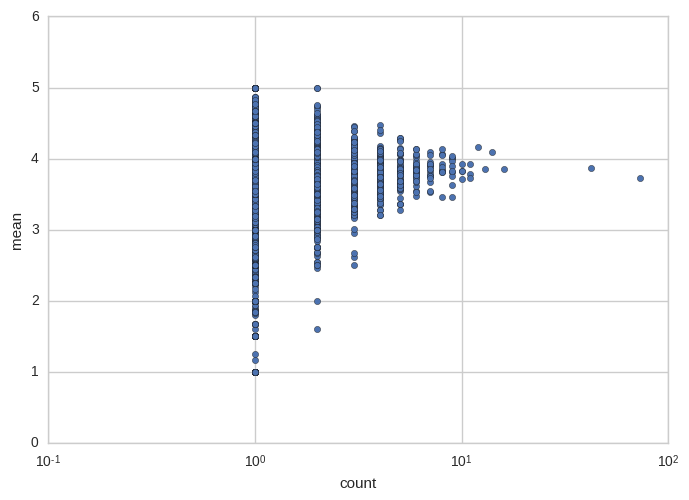

In [26]:
authAverageCount.columns = pd.Index(['count', 'mean'])
authAverageCount.plot(kind='scatter', x='count', y='mean', logx=True)

We can improve this visualization by taking the logarithm of the x-axis.

There is a tendency that the more books an author publishes the less the variability of the rating score.

In [27]:
authRatingDF = BookInfo[['authors', 'average_rating']]
authRatingDF['BookCount'] = authRatingDF.groupby(['authors'])['average_rating'].transform('count')
authRatingDF.head()

/home/kliton/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,authors,average_rating,BookCount
0,NaN,3.00,NaN
1,[{'key': '/authors/OL230045A'}],3.80,1.0
2,[{'key': '/authors/OL244070A'}],4.00,1.0
3,[{'key': '/authors/OL24054A'}],3.57,1.0
4,[{'key': '/authors/OL18073A'}],3.47,3.0


In [28]:
authRatingDF['BookCountLog'] = authRatingDF.BookCount.apply(lambda x: pd.np.log10(x))

/home/kliton/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


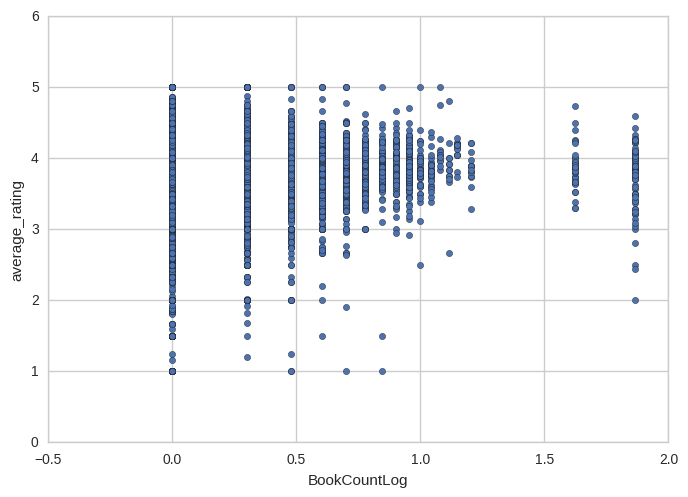

In [29]:
authRatingDF.plot(kind='scatter', x='BookCountLog', y = 'average_rating')

## Average rating by description

In [30]:
descrAvgRatingDF = BookInfo[['description', 'average_rating']]
descrAvgRatingDF['hasDescr'] = BookInfo.description.apply(lambda x: int(not pd.isnull(x)) )

/home/kliton/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


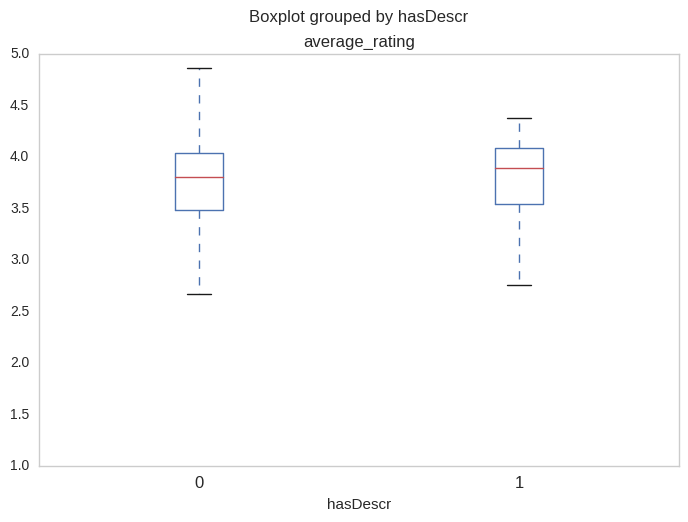

In [31]:
descrAvgRatingDF.boxplot(column='average_rating', by='hasDescr', grid=False);

## Rating by pages

In [32]:
BookInfo['pagesNo'] = BookInfo.pagination.apply(lambda x: list(filter(None, re.findall('\d*', string=x))) if type(x)==str else x)
BookInfo.loc[:, ('pagesNo')] = BookInfo.pagesNo.apply(lambda x: max(x) if (type(x)==list and len(x)>0) else (0 if (type(x)==list and len(x)==0) else x))

In [33]:
BookInfo.loc[:, ('pagesNo')] = BookInfo.pagesNo.apply(lambda x: int(x) if type(x) != float else x)

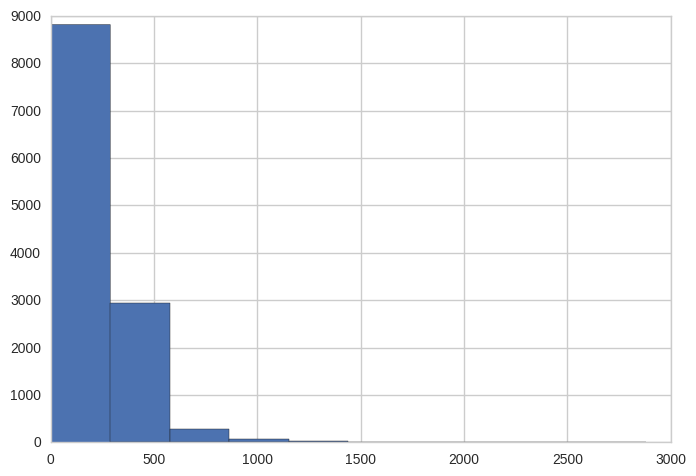

In [34]:
BookInfo.pagesNo.hist()

In [35]:
import numpy as np

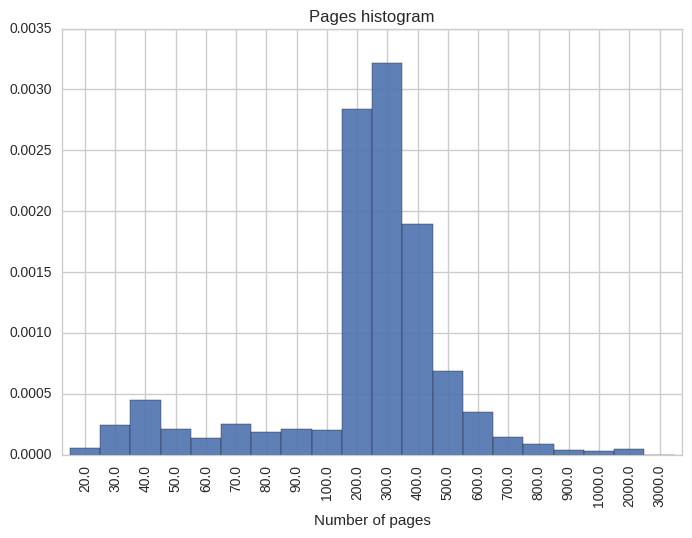

In [36]:
bins = np.concatenate((np.linspace(10, 100, 10), np.linspace(200, 900, 8), np.linspace(1000, 3000, 3)) )
y, x = np.histogram(BookInfo.pagesNo[BookInfo.pagesNo.notnull()], bins=bins, normed=True)
x=x[1:]
histPages = pd.Series(y, x)
ax = histPages.plot(kind='bar', width=1, alpha=0.9, align='center')
ax.set_title('Pages histogram')
ax.set_xlabel('Number of pages')

There are 2 modes in this histogram. The first one is centered around 40 pages and the second one at 300 pages. Most of the books are less than 250 pages long.

In [37]:
BookInfo.pagesNo.value_counts().sort_index(ascending=False).head(10)

2878.0    1
1887.0    1
1722.0    1
1700.0    1
1556.0    1
1533.0    1
1527.0    1
1525.0    1
1379.0    1
1254.0    1
Name: pagesNo, dtype: int64

Interesting to know what are the voluminous works:

In [74]:
BookInfo[['title', 'average_rating', 'pagesNo']][BookInfo.pagesNo >= 900].sort_values(by='pagesNo', ascending=False).head(20) #1254]

,title,average_rating,pagesNo
458,The Longman anthology of world literature,4.08,2878.0
1584,The Bedford introduction to literature,3.99,1887.0
2707,Three Kingdoms,4.38,1722.0
4025,McAughtry's war,3.00,1700.0
2571,The literary experience,3.71,1556.0
6194,Fiction 100,3.97,1533.0
4970,Commedia,4.06,1527.0
5410,Literature,4.11,1525.0
9244,Prose and poetry,4.03,1379.0
11748,Scottish literature in the twentieth century,4.00,1254.0


Works with most pages are mostly collection of different books. These works have good ratings.

Check the correlation between the size of the book by pages and its average score

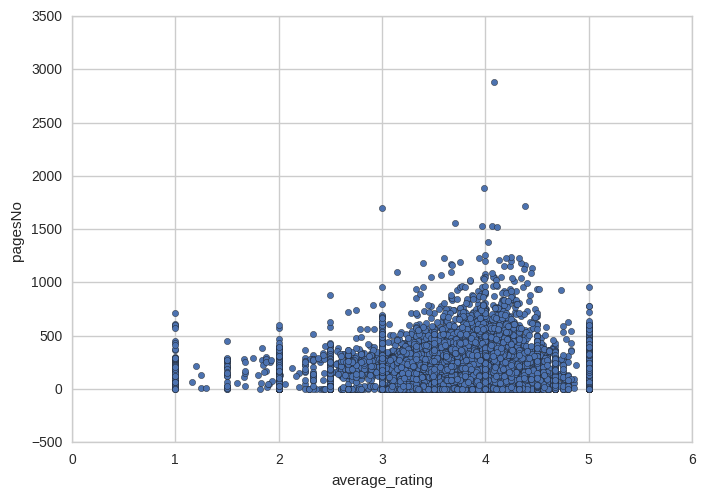

In [39]:
BookInfo[['pagesNo', 'average_rating']].plot(kind='scatter', y='pagesNo', x='average_rating');

In [40]:
BookInfo.publish_date.notnull().value_counts()

True     12180
False       10
Name: publish_date, dtype: int64

In [41]:
BookInfo['publishYear'] = BookInfo.publish_date.apply(lambda x: re.search('\d{4}', str(x) ).group() if re.search('\d{4}', str(x) ) is not None else x )

In [42]:
BookInfo.publishYear[BookInfo.publishYear.apply(lambda x: len(x) != 4 if type(x)==str else True )]

455      NaN
1747     NaN
1749     NaN
1750     NaN
2791     NaN
2795     NaN
6164     NaN
6846     NaN
9102     NaN
10146    NaN
Name: publishYear, dtype: object

In [43]:
BookInfo.loc[:, 'publishYear' ] = BookInfo.publishYear.apply(lambda x: int(x) if type(x)==str else x)

In [44]:
AuthorYearRatingPV = BookInfo.pivot_table(columns='publishYear', index='authors', values='average_rating')

In [45]:
indX = AuthorYearRatingPV.columns[AuthorYearRatingPV.iloc[0, :].notnull().values]

In [46]:
indX.to_series().diff().mean()

14.0

In [47]:
AuthorYearRatingPV.iloc[0, :].mean()

3.335

In [48]:
def CalculateProdScore(row):
    indexList = row.notnull().values
    if len(indexList) == 0 or len(indexList) > len(AuthorYearRatingPV.columns):
        return 0, 0
    indx = AuthorYearRatingPV.columns[indexList]
    mean_vacancy_years = indx.to_series().diff().mean()
    average_score = row.mean()
    return mean_vacancy_years, average_score

In [49]:
AuthProdScore = AuthorYearRatingPV.apply(CalculateProdScore, axis=1)

In [50]:
AuthProdScore = AuthProdScore.apply(pd.Series)

In [51]:
AuthProdScore = AuthProdScore.fillna(0)
AuthProdScore['count'] = AuthorYearRatingPV.count(axis=1)

Now we can visualize the average score of the works of an author by the average difference of the years apart between the works.

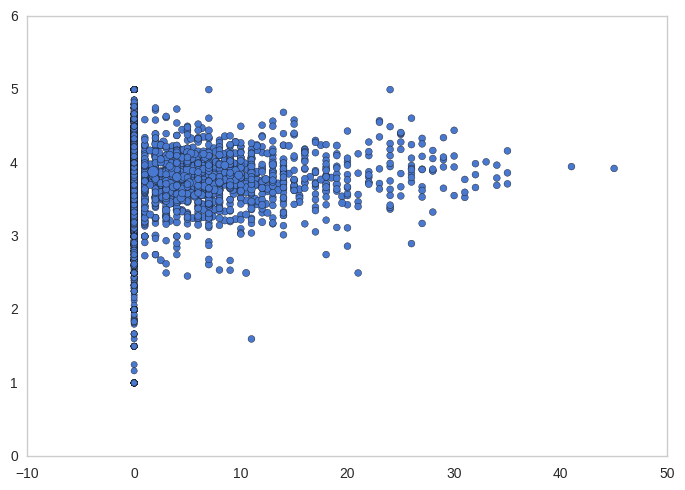

In [52]:
#AuthProdScore.plot(kind='scatter', x=0, y=1, s='count')
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
#ax.legend(CTR['language'])
ax.grid(b=False)
ax.scatter(x=AuthProdScore[0], y=AuthProdScore[1], s=10*AuthProdScore['count'].apply(lambda x: math.sqrt(x)+1));

In [53]:
AuthorYearRatingPV.count(axis=1).describe()

count    8743.000000
mean        1.269358
std         0.883688
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        28.000000
dtype: float64

In [54]:
BookInfo.publish_country.value_counts()

nyu    4758
enk    1765
xxk     862
mau     534
meu     418
cau     359
ilu     276
nju     192
onc     189
pau     169
mnu     160
xxu     153
fr      145
ctu     125
sp      114
miu     103
txu      94
gw       85
wiu      84
at       82
tnu      79
flu      77
ohu      59
ncu      58
cou      58
mdu      52
wau      50
utu      49
it       48
nhu      46
       ... 
ck        2
FR        2
fj        2
nfc       2
rh        2
is        2
pn        2
cc        2
fi        2
pic       1
es        1
vra       1
uik       1
mm        1
ur        1
fg        1
aa        1
gt        1
ce        1
cn        1
pe        1
uy        1
pl        1
bh        1
tr        1
pk        1
wyu       1
aku       1
uk        1
mc        1
Name: publish_country, dtype: int64

In [194]:
BookInfo.subject_place.value_counts()

['United States']                                                                           224
['England']                                                                                 199
['Great Britain']                                                                           141
['Ireland']                                                                                  62
['New York (N.Y.)']                                                                          55
['London (England)']                                                                         42
['Scotland']                                                                                 41
['France']                                                                                   41
['Australia']                                                                                38
['Canada']                                                                                   36
['California']                          

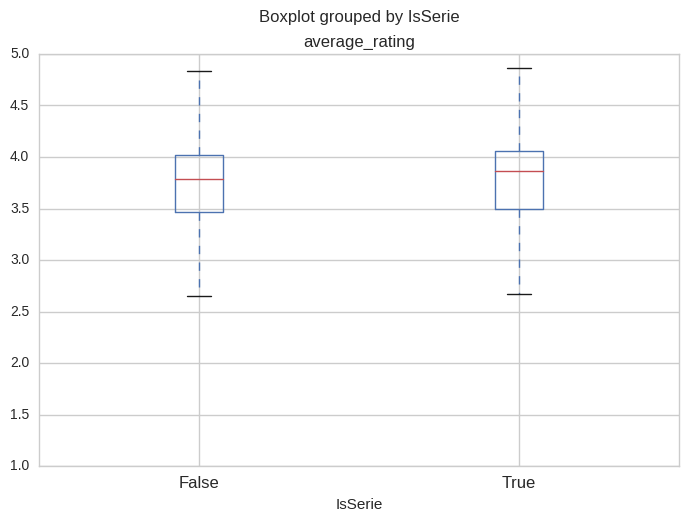

In [81]:
BookInfo.loc[:, ('IsSerie')] = BookInfo.series.notnull()
boxpl = BookInfo.boxplot(column='average_rating', by='IsSerie')
#for item in boxpl.get_xticklabels():
#    item.set_rotation(90)

In [87]:
BookInfo[['series', 'average_rating', 'languagest']][BookInfo.series.notnull() & (BookInfo.languagest=='eng')].sort_values(by='average_rating', ascending=False)


,series,average_rating,languagest
4096,['Little library'],5.000,eng
1712,"['Korean studies series -- no. 20', 'Korean st...",5.000,eng
2947,['Studies in Russian literature and theory'],5.000,eng
2234,['A Reference publication in literature'],5.000,eng
8303,"['Pitt poetry series', 'Pitt paperback ; 129']",5.000,eng
2197,['The Gotham library of the New York Universit...,5.000,eng
7413,['A Golden little look-look book'],5.000,eng
6024,['Fontana lions'],5.000,eng
8510,['Series Q'],5.000,eng
6053,['York notes -- 130'],5.000,eng


In [89]:
BookInfo.subjects.notnull().value_counts()

True     8996
False    3194
Name: subjects, dtype: int64

For the above it could be interesting to bin the average rating and build a word cloud for each bin.

In [93]:
BookInfo[BookInfo.subject_place.notnull()].subject_place.iloc[0:5]

0                     ['Africa, West', 'Africa, West.']
6                                   ['New York (N.Y.)']
9     ['Southwest, New', 'Santa Fe (N.M.)', 'New Mex...
13                                           ['France']
16                                ['England', 'Russia']
Name: subject_place, dtype: object

In [96]:
BookInfo[BookInfo.title=='Othello']

,Unnamed: 0,Unnamed: 0.1,authors,by_statement,contributions,contributors,coverimage,covers,created.type,created.value,...,work_titles,works,isbn10,average_rating,average_rating_sd,dewey_parsed,languagest,pagesNo,publishYear,IsSerie
583,1002,0,[{'key': '/authors/OL9388A'}],edited by Norman Sanders.,"['Sanders, Norman']",NaN,NaN,NaN,/type/datetime,2008-04-01T03:28:50.625462,...,NaN,[{'key': '/works/OL362700W'}],"['0521223393', '0521294541']",3.87,0.0,822,eng,209.0,1984.0,True
6514,2549,0,[{'key': '/authors/OL9388A'}],edited by Nick de Somogyi.,"['De Somogyi, Nick.']",NaN,NaN,[2052288],/type/datetime,2008-04-01T03:28:50.625462,...,NaN,[{'key': '/works/OL362700W'}],['1854596454'],3.87,NaN,822,eng,251.0,2002.0,True
7379,91,0,NaN,edited with a background essay by Mythili Kaul.,"['Kaul, Mythili, 1938-']",NaN,NaN,[1638659],/type/datetime,2008-04-01T03:28:50.625462,...,NaN,NaN,['0882581910'],4.67,NaN,822,eng,223.0,1997.0,False
8036,1182,0,[{'key': '/authors/OL9388A'}],"William Shakespeare ; fully annotated, with an...","['Raffel, Burton.', 'Bloom, Harold.']",NaN,NaN,[162613],/type/datetime,2008-04-01T03:28:50.625462,...,NaN,[{'key': '/works/OL362700W'}],['0300108079'],3.87,NaN,822,eng,0.0,2005.0,True
11843,3378,0,[{'key': '/authors/OL9388A'}],edited and rendered into modern English by Gay...,"['Holste, Gayle.']",NaN,NaN,[517697],/type/datetime,2008-04-01T03:28:50.625462,...,NaN,[{'key': '/works/OL362700W'}],['0764120581'],3.87,NaN,822,eng,319.0,2002.0,True


In [98]:
from wordcloud import WordCloud

In [100]:
BookInfo.title.notnull().value_counts()

True    12190
Name: title, dtype: int64

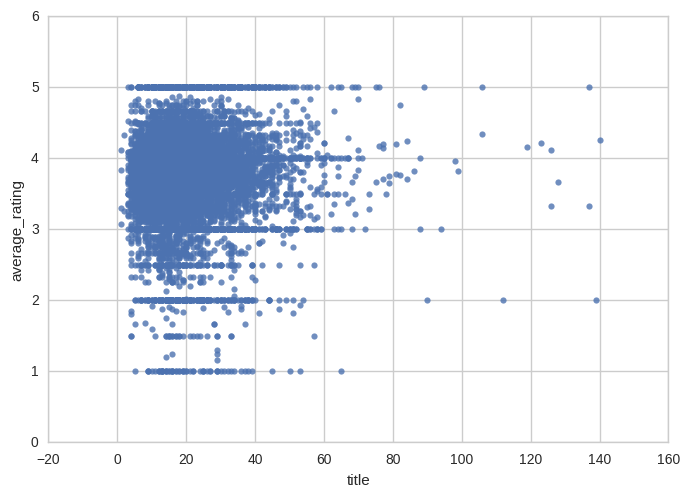

In [102]:
sns.regplot(x=BookInfo.title.str.len(), y=BookInfo.average_rating, fit_reg=False)

In [105]:
titleCorpus = ''
for title in BookInfo.title[BookInfo.languagest == 'eng']:
    titleCorpus += ' ' + title

In [109]:
wc = WordCloud().generate(text=titleCorpus)

(-0.5, 399.5, 199.5, -0.5)

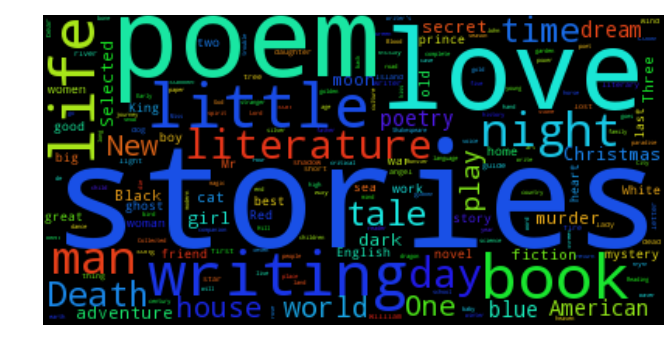

In [111]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

In [ ]:
pd.read_pickle